In [7]:
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, RepeatedKFold
from sklearn.metrics import accuracy_score, mean_absolute_error, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [15]:
df = pd.read_csv('/kaggle/input/omni-dataset/omni2_all_years.dat', header = None, delim_whitespace=True, na_values = [999.9, 9999999, 999.9, 9999, 99.99, 99, 99999])
df

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,1963,1.0,0,1771.0,NaN,NaN,NaN,NaN,NaN,NaN,...,99999.99,99999.99,99999.99,0,3.0,NaN,NaN,NaN,NaN,99.9
1,1963,1.0,1,1771.0,NaN,NaN,NaN,NaN,NaN,NaN,...,99999.99,99999.99,99999.99,0,3.0,NaN,NaN,NaN,NaN,99.9
2,1963,1.0,2,1771.0,NaN,NaN,NaN,NaN,NaN,NaN,...,99999.99,99999.99,99999.99,0,3.0,NaN,NaN,NaN,NaN,99.9
3,1963,1.0,3,1771.0,NaN,NaN,NaN,NaN,NaN,NaN,...,99999.99,99999.99,99999.99,0,7.0,NaN,NaN,NaN,NaN,99.9
4,1963,1.0,4,1771.0,NaN,NaN,NaN,NaN,NaN,NaN,...,99999.99,99999.99,99999.99,0,7.0,NaN,NaN,NaN,NaN,99.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534715,2023,365.0,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99999.99,99999.99,99999.99,0,NaN,NaN,NaN,NaN,NaN,99.9
534716,2023,365.0,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99999.99,99999.99,99999.99,0,NaN,NaN,NaN,NaN,NaN,99.9
534717,2023,365.0,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99999.99,99999.99,99999.99,0,NaN,NaN,NaN,NaN,NaN,99.9
534718,2023,365.0,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99999.99,99999.99,99999.99,0,NaN,NaN,NaN,NaN,NaN,99.9


In [16]:
df = df[[0, 1, 2, 12, 15, 16, 22, 23, 24, 28, 38, 40]]
df.columns = ['Year', 'DDay', 'Hour', 'Bx', 'By', 'Bz', 'T', 'D', 'V', 'P', 'Kp', 'Dst']
df

,Year,DDay,Hour,Bx,By,Bz,T,D,V,P,Kp,Dst
0,1963,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,-6.0
1,1963,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,-5.0
2,1963,1.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,-5.0
3,1963,1.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,-3.0
4,1963,1.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
534715,2023,365.0,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
534716,2023,365.0,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
534717,2023,365.0,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
534718,2023,365.0,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
for column in df.columns:
    if df[column].isnull().sum() > 0:
        df[column].fillna(value=df[column].mean(), inplace=True)

/tmp/ipykernel_28/1208154207.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].fillna(value=df[column].mean(), inplace=True)


In [23]:
df.shape

(534720, 12)

In [ ]:
y_train = df['Dst'][:427776]
y_test = df['Dst'][427776:]
df.drop(columns= ['Dst', 'Kp', 'DDay', 'Hour'],axis=1,inplace = True)
x_train = df[:427776]
x_test = df[427776:]

In [24]:
df.drop(columns= ['Kp', 'DDay', 'Hour'],axis=1,inplace = True)

/tmp/ipykernel_28/2716439936.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns= ['Kp', 'DDay', 'Hour'],axis=1,inplace = True)


In [25]:
def data_load(data):
    X = data.loc[:, data.columns != 'Dst']
    Y = data['Dst']
    return X, Y

def data_split(X, Y, t, s, r):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=t, shuffle=s, random_state=r)
    return x_train, x_test, y_train, y_test

def data_standardization(x_train, x_test):
    sc = StandardScaler()
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)
    return x_train, x_test

In [26]:
x, y = data_load(df)
x_train, x_test, y_train, y_test = data_split(x, y, 0.2, True, False)
x_train, x_val, y_train, y_val = data_split(x_train, y_train, 0.25, True, False)
x_train, x_test = data_standardization(x_train, x_test)

In [27]:
x_train.shape

(320832, 8)

In [11]:
x_train

array([[-1.30569958e+00, -6.67619613e-04,  7.99380057e-04, ...,
        -1.90976080e-03,  1.50908460e+00, -1.81274995e-03],
       [-6.23975002e-01, -1.42132762e+00,  1.37327552e+00, ...,
        -1.44463774e-01,  2.17554382e+00,  1.57221859e+00],
       [-3.96733478e-01, -6.67619613e-04,  7.99380057e-04, ...,
        -1.90976080e-03,  7.92535968e-04, -1.81274995e-03],
       ...,
       [-1.70337224e+00, -6.67619613e-04,  7.99380057e-04, ...,
        -1.90976080e-03,  7.92535968e-04, -1.81274995e-03],
       [ 7.39474145e-01, -9.83035205e-01,  3.30711788e-01, ...,
        -7.08625581e-01, -2.41782852e-01, -7.35156253e-01],
       [ 7.39474145e-01,  6.44908046e-01,  1.74975687e+00, ...,
        -2.31257898e-01, -6.59731856e-01, -5.43937343e-01]])

In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense,LSTM

# define our model
model_config = {"n_epochs": 20, "n_neurons": 512, "dropout": 0.4, "stateful": False}

model = Sequential()
model.add(
    LSTM(
        model_config["n_neurons"],
        # usually set to (`batch_size`, `sequence_length`, `n_features`)
        batch_input_shape=(None, 128, 8),
        stateful=model_config["stateful"],
        dropout=model_config["dropout"],
    )
)
model.add(Dense(1 ))
model.compile(
    loss="mean_squared_error",
    optimizer="adam",
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 512)               1067008   
                                                                 
 dense (Dense)               (None, 1)                 513       
                                                                 
Total params: 1,067,521
Trainable params: 1,067,521
Non-trainable params: 0
_________________________________________________________________


In [46]:
x, y = data_load(df)
x_train, x_test, y_train, y_test = data_split(x, y, 0.2, True, False)
x_train, x_val, y_train, y_val = data_split(x_train, y_train, 0.25, True, False)
x_train, x_test = data_standardization(x_train, x_test)

In [28]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from keras import optimizers

# Reshape the input data to 3D
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))

# Define the LSTM model
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(64, input_shape=input_shape))
    model.add(Dense(1))
    return model

# Create the LSTM model
input_shape = (1, 8)  # Shape of each input sample after reshaping
model = create_lstm_model(input_shape)

# Compile the model
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss='mse', optimizer=sgd, metrics=['accuracy'])

# Fit the model
model.fit(x_train, y_train, batch_size=32, epochs=20)

# Reshape the test data to 3D
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

# Make predictions
predictions = model.predict(x_test)

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


10026/10026 [==============================] - 36s 3ms/step - loss: 354.3392 - accuracy: 0.0255
Epoch 2/20
10026/10026 [==============================] - 31s 3ms/step - loss: 346.4956 - accuracy: 0.0252
Epoch 3/20
10026/10026 [==============================] - 31s 3ms/step - loss: 346.2996 - accuracy: 0.0250
Epoch 4/20
10026/10026 [==============================] - 31s 3ms/step - loss: 343.1151 - accuracy: 0.0251
Epoch 5/20
10026/10026 [==============================] - 31s 3ms/step - loss: 340.6687 - accuracy: 0.0252
Epoch 6/20
10026/10026 [==============================] - 30s 3ms/step - loss: 340.0388 - accuracy: 0.0252
Epoch 7/20
10026/10026 [==============================] - 30s 3ms/step - loss: 338.9543 - accuracy: 0.0253
Epoch 8/20
10026/10026 [==============================] - 30s 3ms/step - loss: 339.9854 - accuracy: 0.0252
Epoch 9/20
10026/10026 [==============================] - 30s 3ms/step - loss: 338.4142 - accuracy: 0.0252
Epoch 10/20
10026/10026 [=======================

In [33]:
for name, values in history.history.items():
    plt.plot(values)

(320832, 8)

In [34]:
y_train.shape

(320832,)

In [ ]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Fscore: %.2f' % f1_score(y_test, y_pred))

In [ ]:
for name, values in history.history.items():
    plt.plot(values)

In [32]:
loss, accuracy = model.evaluate(x_test, y_test)

3342/3342 [==============================] - 8s 2ms/step - loss: 342.6749 - accuracy: 0.0255


In [33]:
print(f"Test MSE: {loss**.5:.2f}")

Test RMSE: 18.51


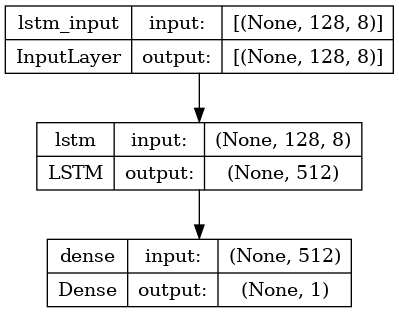

In [14]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='lstm_model.png', show_shapes=True)